# Bootstrapping

The `pymultifracs` package offers the possibility to perform bootstrapping on multi-resolution quantities in order to sample new observations. From those bootstrapped samples, we can extract confidence intervals, automatically detect an optimal fitting range, and find optimal weights for linear regression.

In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
sns.set_theme(style="darkgrid")
sns.set_context('paper')

## Generate a signal

Let us simulate a few irregular MRWs for analysis.

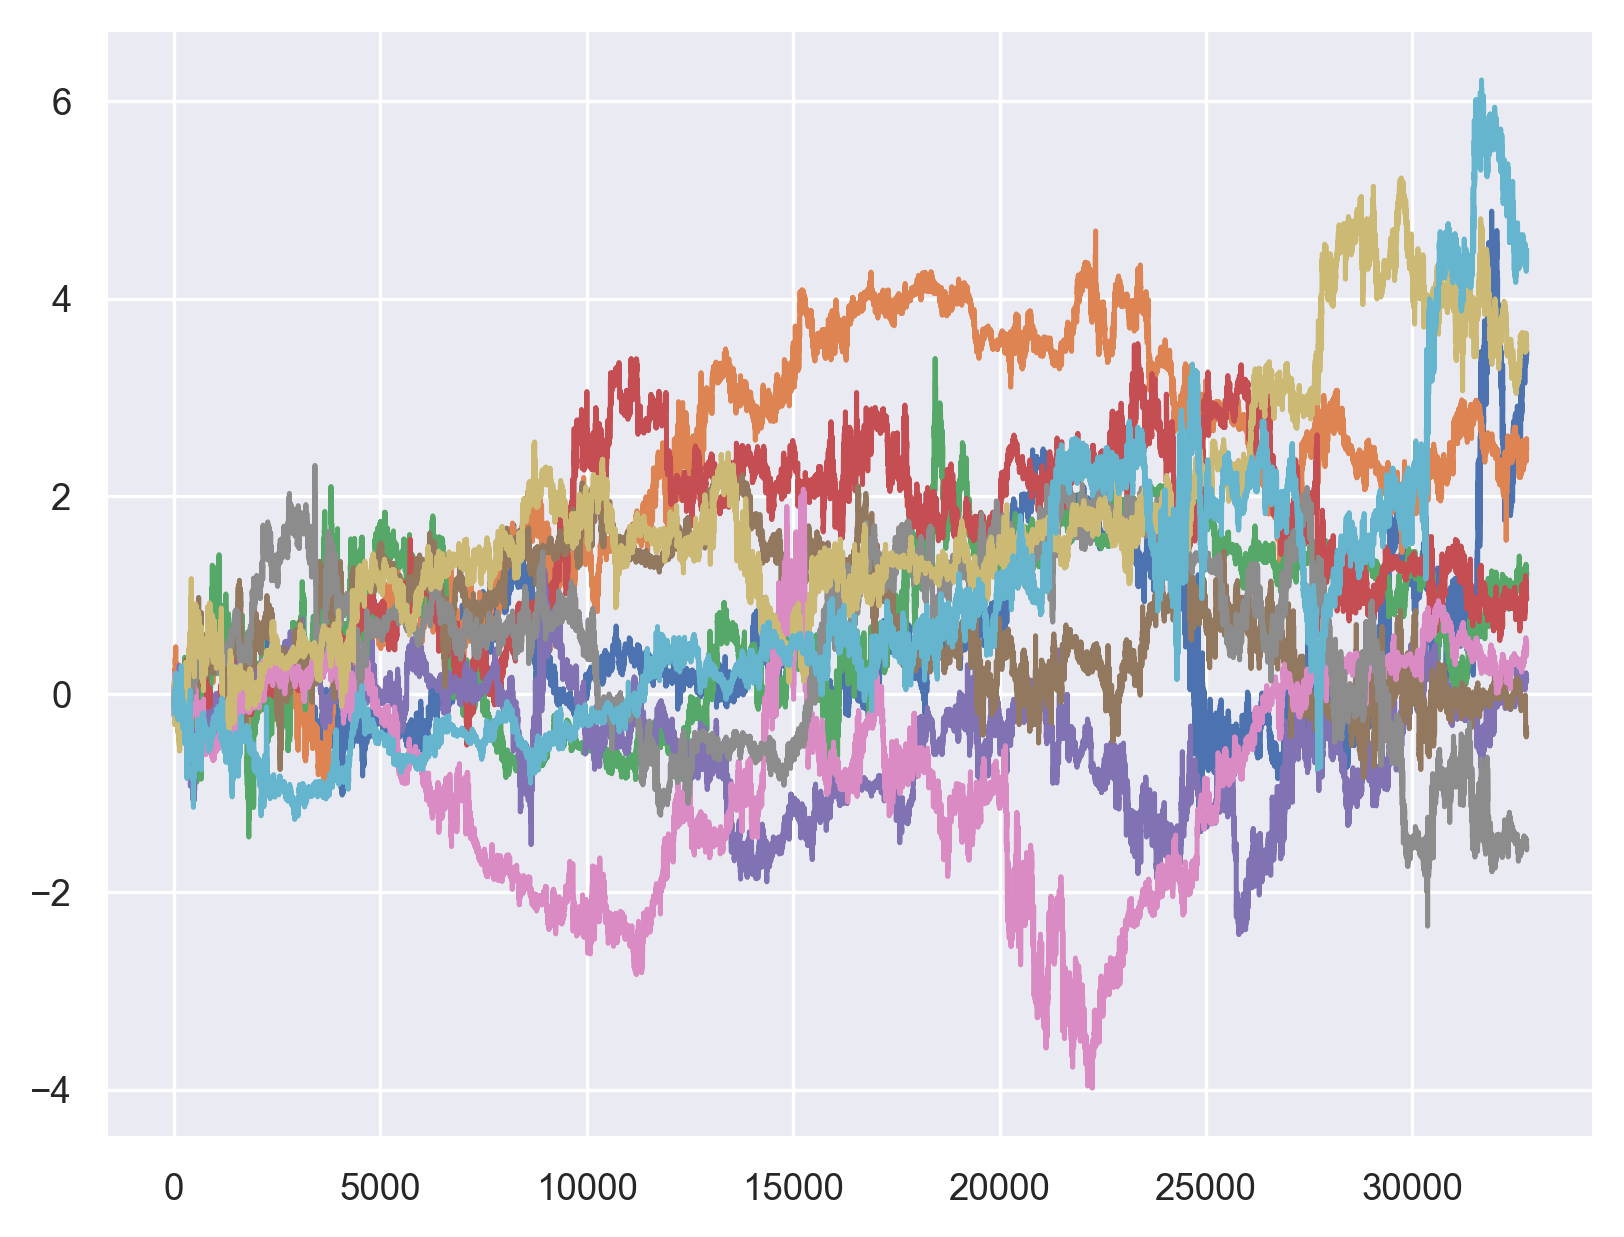

In [12]:
import numpy as np
from pymultifracs.simul import mrw
import matplotlib.pyplot as plt

X = mrw(shape=(2**15, 10), H=0.3, lam=np.sqrt(.05), L=2**15)
plt.plot(X[:, :10])

Bootstrapping is done when calling the `mfa` function by passing the `R` parameter where R is the number of bootstrapped samples, with R > 1.

In [13]:
from pymultifracs import mfa, wavelet_analysis

scaling_ranges=[(2, 8)]

WTpL = wavelet_analysis(X).get_leaders(2)
pwt = mfa(WTpL, scaling_ranges, R=100)

The plotting functions automatically detect the presence of bootstrapping and display confidence intervals. This behavior is controlled by the `plot_CI` parameter.

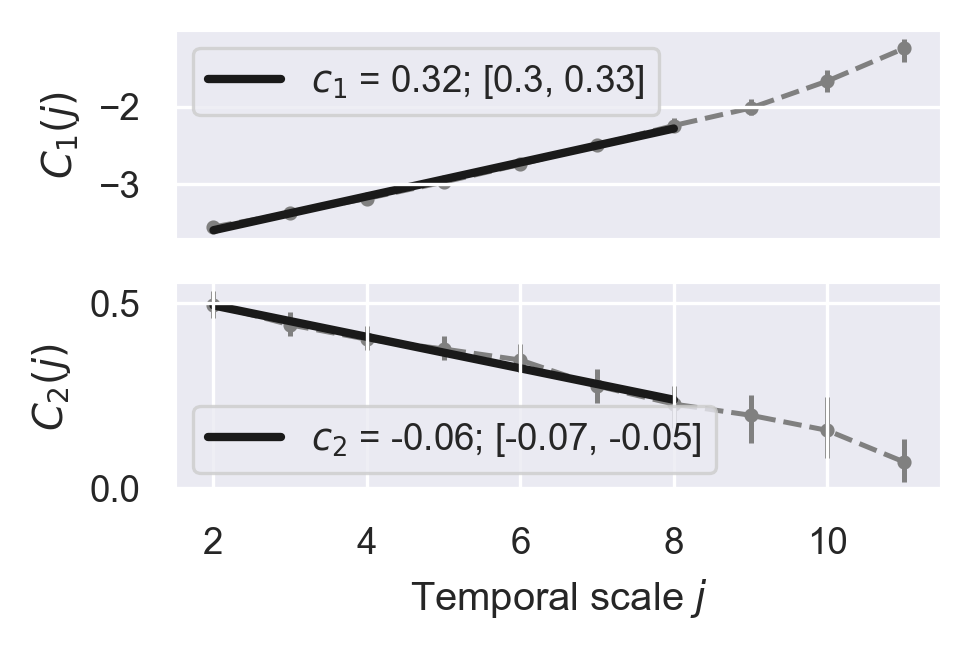

In [14]:
pwt.cumulants.plot()

The toolbox offers the possibility to derive bootstrap-based statistics by using prefixes when calling the attributes of the Scaling Functions:

In [25]:
pwt.cumulants.CIE_c2

array([[[-0.05050043, -0.07126313],
        [-0.04275943, -0.05520048],
        [-0.02758248, -0.05278718],
        [-0.047252  , -0.06418395],
        [-0.05127886, -0.06884117],
        [-0.03814018, -0.05727156],
        [-0.02498239, -0.05361273],
        [-0.03849548, -0.05628945],
        [-0.04560163, -0.0608643 ],
        [-0.0277121 , -0.06123694]]])

The prefix also works for functions:

In [29]:
pwt.structure.CIE_s_q(2)

array([[[0.54392657, 0.45425246],
        [0.53383067, 0.48453181],
        [0.58474135, 0.51267291],
        [0.611266  , 0.55648984],
        [0.55701426, 0.50056766],
        [0.59319551, 0.53239771],
        [0.66959766, 0.56660953],
        [0.58253432, 0.51686812],
        [0.58833128, 0.53834434],
        [0.65437141, 0.54990686]]])

The prefixes are defined as follows:

- `'CI_'`: confidence intervals at 95% of the bootstrapped values
- `'STD_'`: standard deviation of the bootstrapped values
- `'V_'`: variance of the bootstrapped values
- `'CIE_'`: empirical nonparametric confidence interval

The following references provide a clarification on the difference between the confidence interval of the bootstrapped observations and the empirical bootstrap confidence interval:

